In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

sys.path.append('NBAStatScraper/database/databasePrep/')
import prep_games as prep

In [18]:
tor_df = prep.prep_season_results('TOR', '2019')
tor_df['Tm'] = pd.to_numeric(tor_df['Tm'])
tor_df['Opp'] = pd.to_numeric(tor_df['Opp'])
gsw_df = prep.prep_season_results('GSW', '2019')
gsw_df['Tm'] = pd.to_numeric(gsw_df['Tm'])
gsw_df['Opp'] = pd.to_numeric(gsw_df['Opp'])

#For playoffs
# tor_df = prep.prep_playoff_results('TOR', '2019')
# tor_df['Tm'] = pd.to_numeric(tor_df['Tm'])
# tor_df['Opp'] = pd.to_numeric(tor_df['Opp'])
# gsw_df = prep.prep_playoff_results('GSW', '2019')
# gsw_df['Tm'] = pd.to_numeric(gsw_df['Tm'])
# gsw_df['Opp'] = pd.to_numeric(gsw_df['Opp'])

(86.0, 149.0, 0.0, 25.0)

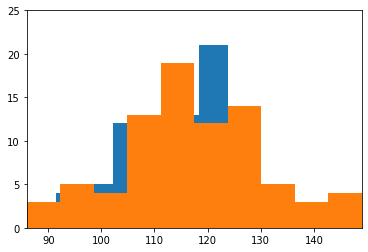

In [19]:
plt.hist(tor_df.Tm, histtype='stepfilled')
plt.hist(gsw_df.Tm, histtype='stepfilled')
plt.axis([min([min(tor_df.Tm), min(gsw_df.Tm)]), max([max(tor_df.Tm), max(gsw_df.Tm)]), 0, 25])

(83.0, 140.0, 0.0, 25.0)

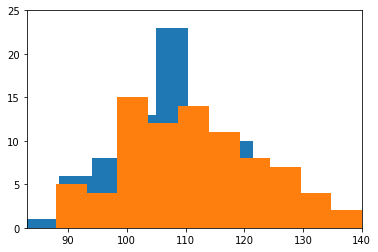

In [20]:
plt.hist(tor_df.Opp, histtype='stepfilled')
plt.hist(gsw_df.Opp, histtype='stepfilled')
plt.axis([min([min(tor_df.Opp), min(gsw_df.Opp)]), max([max(tor_df.Opp), max(gsw_df.Opp)]), 0, 25])

In [21]:
# Get means and standard deviations of points
tor_tm_mean  = tor_df.Tm.mean()
tor_tm_std   = tor_df.Tm.std()
tor_opp_mean = tor_df.Opp.mean()
tor_opp_std  = tor_df.Opp.std()

gsw_tm_mean  = gsw_df.Tm.mean()
gsw_tm_std   = gsw_df.Tm.std()
gsw_opp_mean = gsw_df.Opp.mean()
gsw_opp_std  = gsw_df.Opp.std()

In [22]:
def simulate_single_game():
    tor_score = (random.gauss(tor_tm_mean,tor_tm_std)+random.gauss(gsw_opp_mean,gsw_opp_std))/2
    gsw_score = (random.gauss(gsw_tm_mean,gsw_tm_std)+random.gauss(tor_opp_mean,tor_opp_std))/2
    if tor_score > gsw_score:
        return 'tor'
    return 'gsw'

In [23]:
def simulate_multiple_games(num):
    tor = 0
    gsw = 0
    for i in range(num):
        winner = simulate_single_game()
        if winner == 'tor':
            tor += 1
        else:
            gsw += 1
    return [tor, gsw]

In [24]:
num_games_to_simulate = 1000
results = simulate_multiple_games(num_games_to_simulate)
print("Number of games run: {}".format(num_games_to_simulate))
print("Toronto won {} games. ({}%)".format(results[0], (results[0]/num_games_to_simulate*100)))
print("Golden State won {} games. ({}%)".format(results[1], (results[1]/num_games_to_simulate*100)))

Number of games run: 1000
Toronto won 505 games. (50.5%)
Golden State won 495 games. (49.5%)


In [25]:
def simulate_series(num_series):
    tor = 0
    gsw = 0
    for i in range(num_series):
        tor_s = 0
        gsw_s = 0
        while gsw_s < 4 and tor_s < 4:
            winner = simulate_single_game()
            if winner == 'tor':
                tor_s += 1
            else:
                gsw_s += 1
            if tor_s == 4:
                tor += 1
            elif gsw_s == 4:
                gsw += 1
    return [tor, gsw]

In [27]:
num_series_to_simulate = 100000
results = simulate_series(num_series_to_simulate)
print("Number of series run: {}".format(num_series_to_simulate))
print("Toronto won {} series. ({}%)".format(results[0], (results[0]/num_series_to_simulate*100)))
print("Golden State won {} series. ({}%)".format(results[1], (results[1]/num_series_to_simulate*100)))

Number of series run: 100000
Toronto won 48756 series. (48.756%)
Golden State won 51244 series. (51.244%)
